# Accuracy w.r.t. Distance

This notebook demonstrates how to reproduce fig.X from [Farrens et al. (2020)](), which compares the blended source classification accuracy of BlendHunter to that of [SExtractor]() as function of the distance between the galaxies.

In order to run this script locally, you will need to either [download the final classification results]() or [rerun the scripts to generate these results](). You will also need a Python environment with [Jupyter](), [numpy]() and [matplotlib]() installed.

## Contents

1. [Import Dependencies](#Import-Dependencies)
1. [Plotting Routine](#Plotting-Routine)
1. [Load Results](#Load-Results)
1. [Plot Figure](#Plot-Figure)

## Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting Routine

The routine used to generate fig.X from [Farrens et al. (2020)]().

In [2]:
def plot_acc_distances(sigma_values, distance, acc_bh, acc_se):
    """Plot Accuracy w.r.t. Distance
    
    Plot classification accuracy as function of distance between objects in pixels for different 
    noise standard deviation values.
    
    Parameters
    ----------
    sigma_values :
        Noise standard deviation values
    distance :
        Mean distance of objects in a given bin
    acc_bh :
        Aaverage BlendHunter classification accuracy values
    acc_se :
        Average SExtractor classification accuracy values

    """
   
    # Set figure properties
    fig, axes = plt.subplots(3, 2, figsize=(20,17), sharex='col', sharey='row',
                             gridspec_kw={'hspace': 0, 'wspace': 0})
    fig.suptitle('Classification accuracy as a function of distance', fontsize=20, y=0.91)
    axes = axes.ravel()
    
    # Loop through figures for each noise level
    for ax, bh, se, sigma, index in zip(axes, acc_bh, acc_se, sigma_values, range(len(axes))):
        
        # Plot accuracy w.r.t. distance
        ax.plot(distance, bh, color='k', marker='.', label='BlendHunter')
        ax.plot(distance, se, color='steelblue', marker='.', label='SExtractor')
        ax.fill_between(distance, bh, y2=se, where=bh > se, interpolate=True, hatch="/", edgecolor="k", 
                        alpha=0.3 ,label='Gain w.r.t. SExtractor')
        ax.plot((-2, 38), (1, 1), 'k--', alpha=0.3)
        
        # Add legend and axis labels
        ax.set_xlim(-1, 37)
        ax.set_ylim(0, 1.2)
        ax.legend(borderaxespad=0.1, loc="lower center", fontsize=18, prop ={'family': 'monospace','size': 15})
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_yticks(np.arange(6) * 0.2)
        if not index % 2:
            ax.set_ylabel('Classification Accuracy', fontsize=18)
        ax.set_xlabel('Distance between objects (pixels)', fontsize=18)
        ax.text(.5, .9, r'$\sigma$ = {}'.format(sigma), fontsize=20, horizontalalignment='center', 
                transform=ax.transAxes)

    # Display figure
    plt.show()


## Load Results

Load the classification accuracy results.

In [3]:
# Set the path to the results
results_path = '../results/'

# Load the results
sigma_values = np.load(results_path + 'sigmas.npy', allow_pickle=True)
dist_results = np.load(results_path + 'sim_results/dist_results.npy', allow_pickle=True)

## Plot Figure

Plot the classification accuracy as a function distancce for BlendHunter and SExtractor.

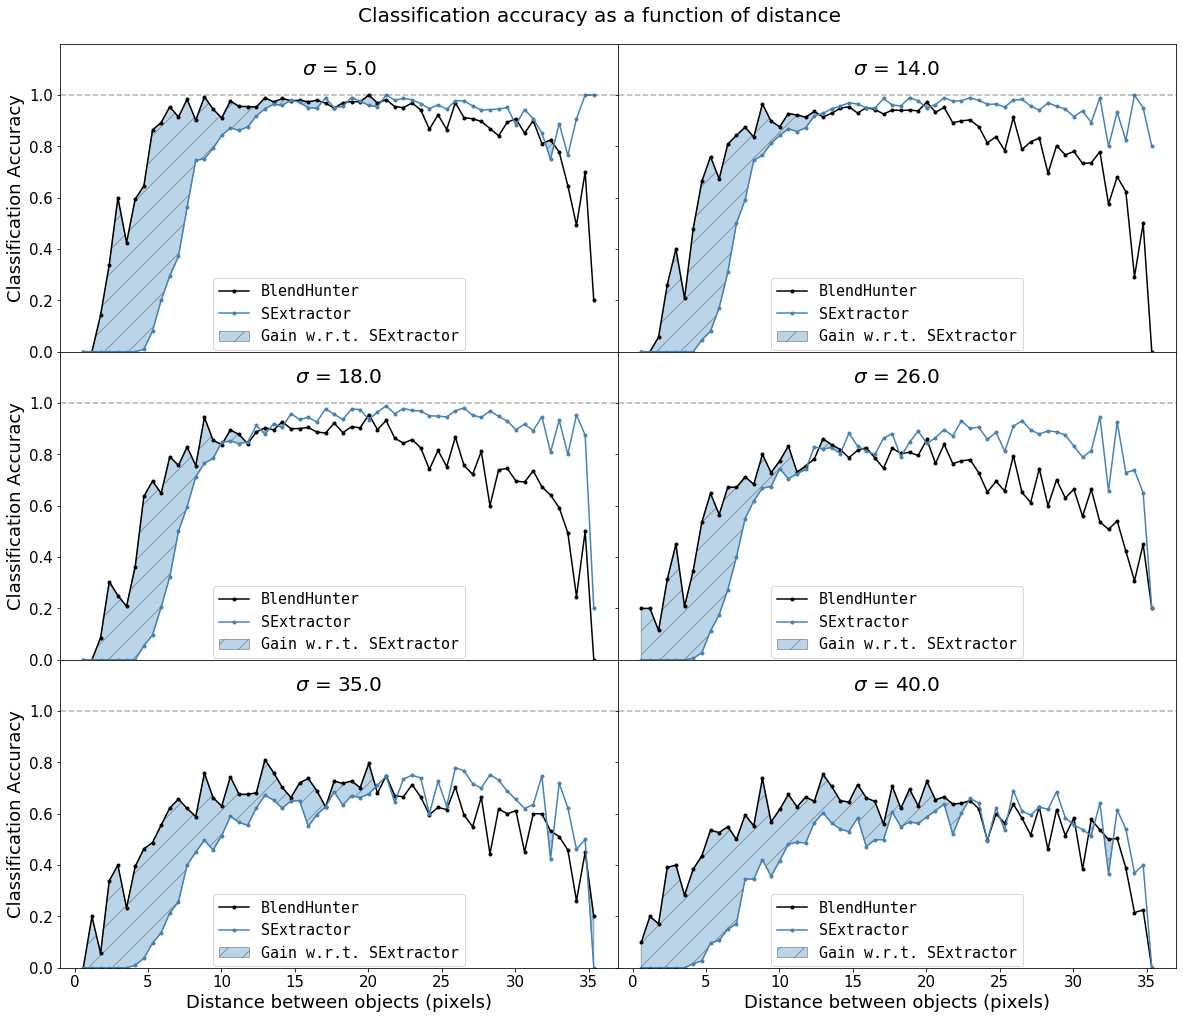

In [4]:
plot_acc_distances(sigma_values, *dist_results)  